# Bio-Inspired Airfoil Performance

## Replicating Effects of Protuberances on Airfoils

Biologically inspired airfoils are nothing new, but the technology to reproduce them in simulations has only grown in sophistication since their conception thousands of years ago. Thankfully, today, we have resources like XFLR5 available to simulate these developing technologies. In this notebook, we'll try to reproduce (INSERT A LINK TO REAL WORK HERE)'s results.

#### Step one will, as always, be importing all of our requisite libraries.

In [29]:
import numpy
import math
from matplotlib import pyplot
# embed the plots into the notebook
%matplotlib inline
# show inline figures
from IPython.display import Image

Usually, this would be where we'd start to bring in the classes: Panels, in particular. They'd be joined by their friend Freestream and a few others. Fortunately (or unfortunately, depending on how you feel about classes), we actually don't need them for this project. We'll be looking at data from my good friend XFLR5, whose history was discussed in class. 

The method for XFLR5 simulation was heavily Google-based. A smattering of tutorials do exist for the software, both official and otherwise. The most highly recommended resource, of course, is the official XFLR5 documentation.

Before we look at any fancy plots, I think we need an introduction to and a visual demonstration of the airfoil in use. The NACA 63021 is generally accepted, among bio-philes, as the closest NACA representation of a humpback whale fin. This is the airfoil used by Watts and Fish, first with a traditional flat-front wing, then with a sinusoidal wing. The cross-section remains constant, and it is plotted below.

In [28]:
foilpath = 'NACA63021.dat'
with open (foilpath, 'r') as file_name:
    x, y = numpy.loadtxt(file_name, dtype=float, delimiter=' ', unpack=True)

ValueError: could not convert string to float: 

## Straight-Leading-Edge Wings

Cp Results: Watts-Fish simulation, straight-edge wing


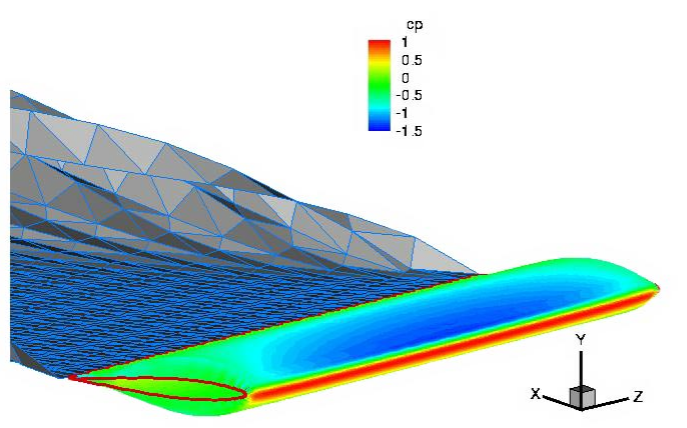

In [30]:
print('Cp Results: Watts-Fish simulation, straight-edge wing')
Image('WF_flat_cp.png')

Cp Results: XFLR5 simulation, straight-edge wing


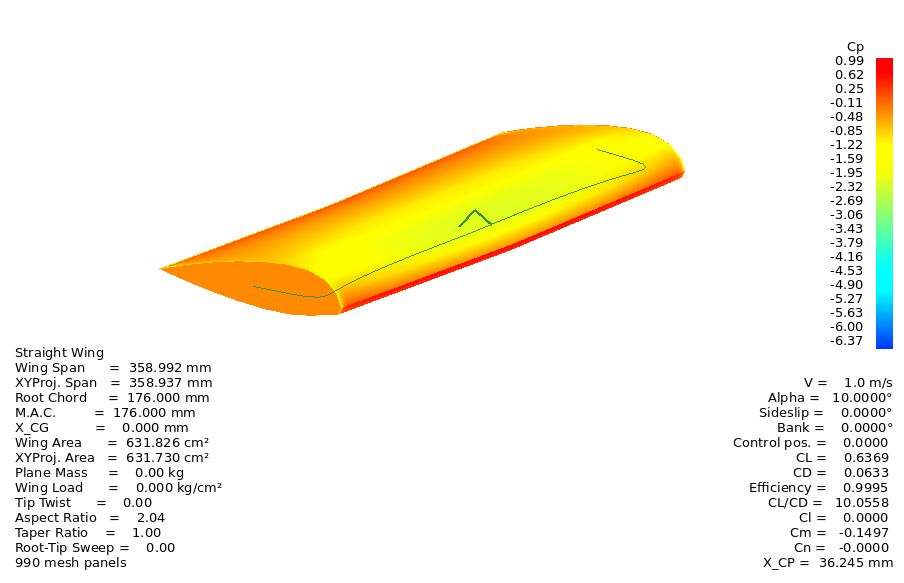

In [26]:
print('Cp Results: XFLR5 simulation, straight-edge wing')
Image('lydia_flat_cp.png')

### Coefficients of Pressure, Straight-Leading-Edge

Although the colorbar scaling is different (who knew documentation could be *so hard* to navigate?), the results are visually comparable. There is a band of bright yellow, representing Cp = ~-1.5, in the XFLR5 results, at around the same location as the blue indicating the tail end of the Watts/Fish results colorbar, representing CP = -1.5 right on the dot.

In future, I would absolutely recommend finding a way to export pressure coefficients to a text file, perhaps with three columns of location data and a column of coefficient values.

### Coefficients of Lift and Drag, Straight-Leading-Edge

Here's where it starts to get interesting. Watts and Fish got specific CL and CD results in their inviscid simulation, given below. The XFLR5 simulation results are shown in the above figure, but are repeated below for comparison purposes.

In [34]:
WF_flat_CL = 0.435
WF_flat_CD = 0.0562

lydia_flat_CL = 0.6369
lydia_flat_CD = 0.0633

# calculate % error and round to nearest int value
CL_error_flat = 100*(lydia_flat_CL - WF_flat_CL) / WF_flat_CL
CL_error_flat = int(CL_error_flat)
CD_error_flat = 100*(lydia_flat_CD - WF_flat_CD) / WF_flat_CD
CD_error_flat = int(CD_error_flat)

print('Percent error, Lift Coefficient: ' + str(CL_error_flat) + '%')
print('Percent error, Drag Coefficient: ' + str(CD_error_flat) + '%')

Percent error, Lift Coefficient: 46%
Percent error, Drag Coefficient: 12%


While the coefficients of pressure are remarkably similar, the lift coefficients in particularly are markedly different. The same velocities and wing dimensions were used by Gleaves and by Watts and Fish. It is possible that Watts and Fish assumed a different altitude, resulting in a different air density value, leading to vastly different lift and drag coefficients. 

This does *not* imply any reason for the different percent errors of CL and CD. Further reading should be done to fully explore this issue. 

## Sinusoidal-Leading-Edge Wings

The sinusoidal wings are the biologically-inspired set. Unfortunately, Watts and Fish do not provide an equation used, or even specific dimensions used, for generating their sinusoid. It was assumed that it was a monomial equation and that the amplitude was equal to a maximum of 10% of the total chord length, an estimate given in the original paper. Finally, from a visual-only guess, it appeared that the wingspan included 4.5 periods of the equation. 

With these numbers in mind, an equation was built fulfilling these requirements. 

Unfortunately, XFLR5 allows a maximum of 30 points on the leading edge to be specified. As these are symmetric, the wing was built from the inside (0,0) marker to the outside (0,chord/2) marker, technically giving 59 points total. This, however, was still not enough resolution to provide a beautiful sinusoid. It did the job, but it would have been nice (if more computationally weighty) to have a little more detail in the final picture. 

Cp Results: Watts-Fish simulation, curved-edge wing


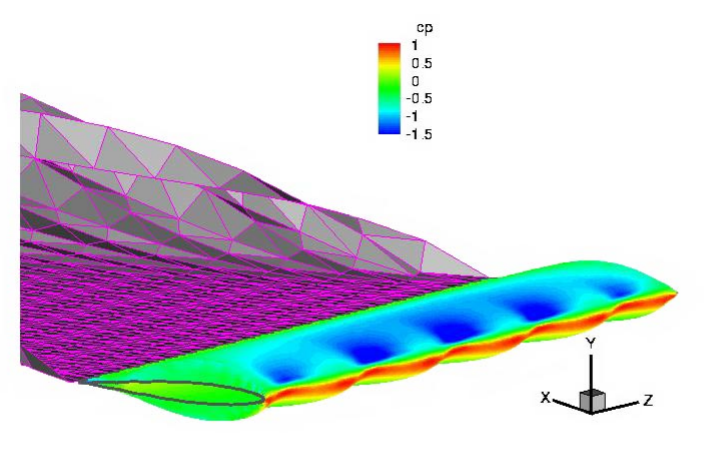

In [32]:
print('Cp Results: Watts-Fish simulation, curved-edge wing')
Image('WF_curve_cp.png')

Cp Results: CFLR5 simulation, curved-edge wing


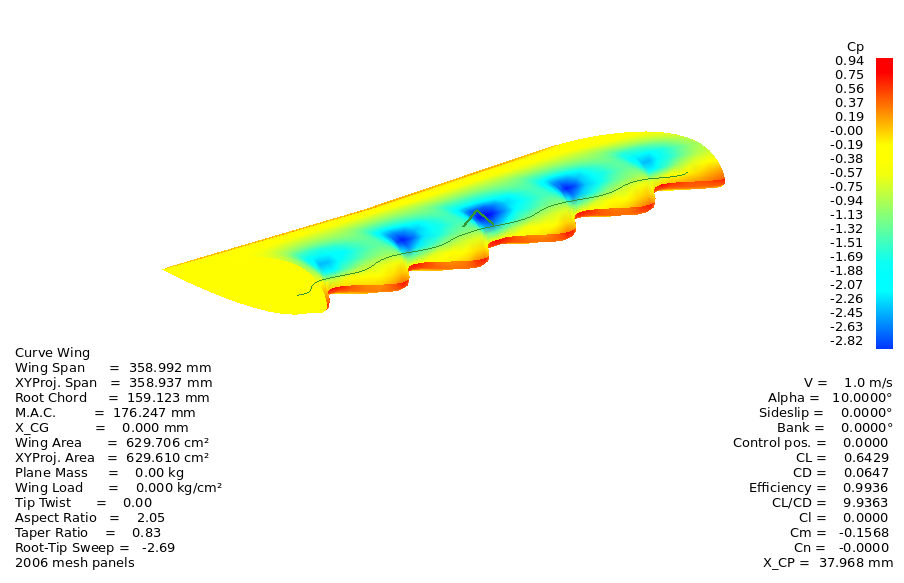

In [33]:
print('Cp Results: CFLR5 simulation, curved-edge wing')
Image('lydia_curve_cp.png')

Again, despite the colorbar differences, it is visually apparent that the coefficient of pressure results are at least on the same order of magnitude and are certainly within a few decimal places of one another. 

### Coefficients of Lift and Drag, Curved-Leading-Edge


In [35]:
WF_curve_CL = 0.456
WF_curve_CD = 0.0501

lydia_curve_CL = 0.6429
lydia_curve_CD = 0.0647

# calculate % error and round to nearest int value
CL_error_curve = 100*(lydia_curve_CL - WF_curve_CL) / WF_curve_CL
CL_error_curve = int(CL_error_curve)
CD_error_curve = 100*(lydia_curve_CD - WF_curve_CD) / WF_curve_CD
CD_error_curve = int(CD_error_curve)

print('Percent error, Lift Coefficient: ' + str(CL_error_curve) + '%')
print('Percent error, Drag Coefficient: ' + str(CD_error_curve) + '%')

Percent error, Lift Coefficient: 40%
Percent error, Drag Coefficient: 29%


Interestingly, while the lift coefficient error stays in the same general range, the drag coefficient error nearly doubles. Again, this issue was unresolved and warrants further investigation.

In [36]:
change_CL_error = 100*(CL_error_flat - CL_error_curve) / CL_error_flat
change_CD_error = 100*(CD_error_flat - CD_error_curve) / CD_error_flat

print('Change in error, Lift Coefficient: ' + str(change_CL_error) + '%')
print('Change in error, Drag Coefficient: ' + str(change_CD_error) + '%')

Change in error, Lift Coefficient: 13.043478260869565%
Change in error, Drag Coefficient: -141.66666666666666%


As stated above, the drag coefficient error changed *drastically*, while the lift coefficient error remained approximately the same. 

If I could do this project over, I would make more of an effort to find the exact altitude Watts and Fish estimated and use the properties of air at that point in my XLFR5 simulations.